In [37]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datasist.structdata import detect_outliers

### `Data URL` https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275

### `Read Dataset`

In [38]:
df = pd.read_csv("train.csv", na_values=['Unknown', '', 'na', 'nan', 'NA', 'NAN' ])
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [39]:
df.shape

(103904, 25)

In [40]:
# trim and replace space inside columns names with _
df.columns = df.columns.str.lower().str.strip().str.strip().str.replace(' ', '_')
df.head(3)

,unnamed:_0,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


### `Drop not-needed columns ID - Index`

In [41]:
df.drop(['unnamed:_0', 'id'], axis=1, inplace=True)
df.head(3)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


### `Check the datatypes of the columns`

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

In [43]:
df.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [44]:
df.describe(include=['O'])

,gender,customer_type,type_of_travel,class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### `Check number of NA cells in each column`

In [45]:
# print the percentage of null cells in each column ordered desc 
df.isna().sum().sort_values(ascending=False) / df.shape[0]

arrival_delay_in_minutes             0.002984
gender                               0.000000
seat_comfort                         0.000000
departure_delay_in_minutes           0.000000
cleanliness                          0.000000
inflight_service                     0.000000
checkin_service                      0.000000
baggage_handling                     0.000000
leg_room_service                     0.000000
on-board_service                     0.000000
inflight_entertainment               0.000000
online_boarding                      0.000000
customer_type                        0.000000
food_and_drink                       0.000000
gate_location                        0.000000
ease_of_online_booking               0.000000
departure/arrival_time_convenient    0.000000
inflight_wifi_service                0.000000
flight_distance                      0.000000
class                                0.000000
type_of_travel                       0.000000
age                               

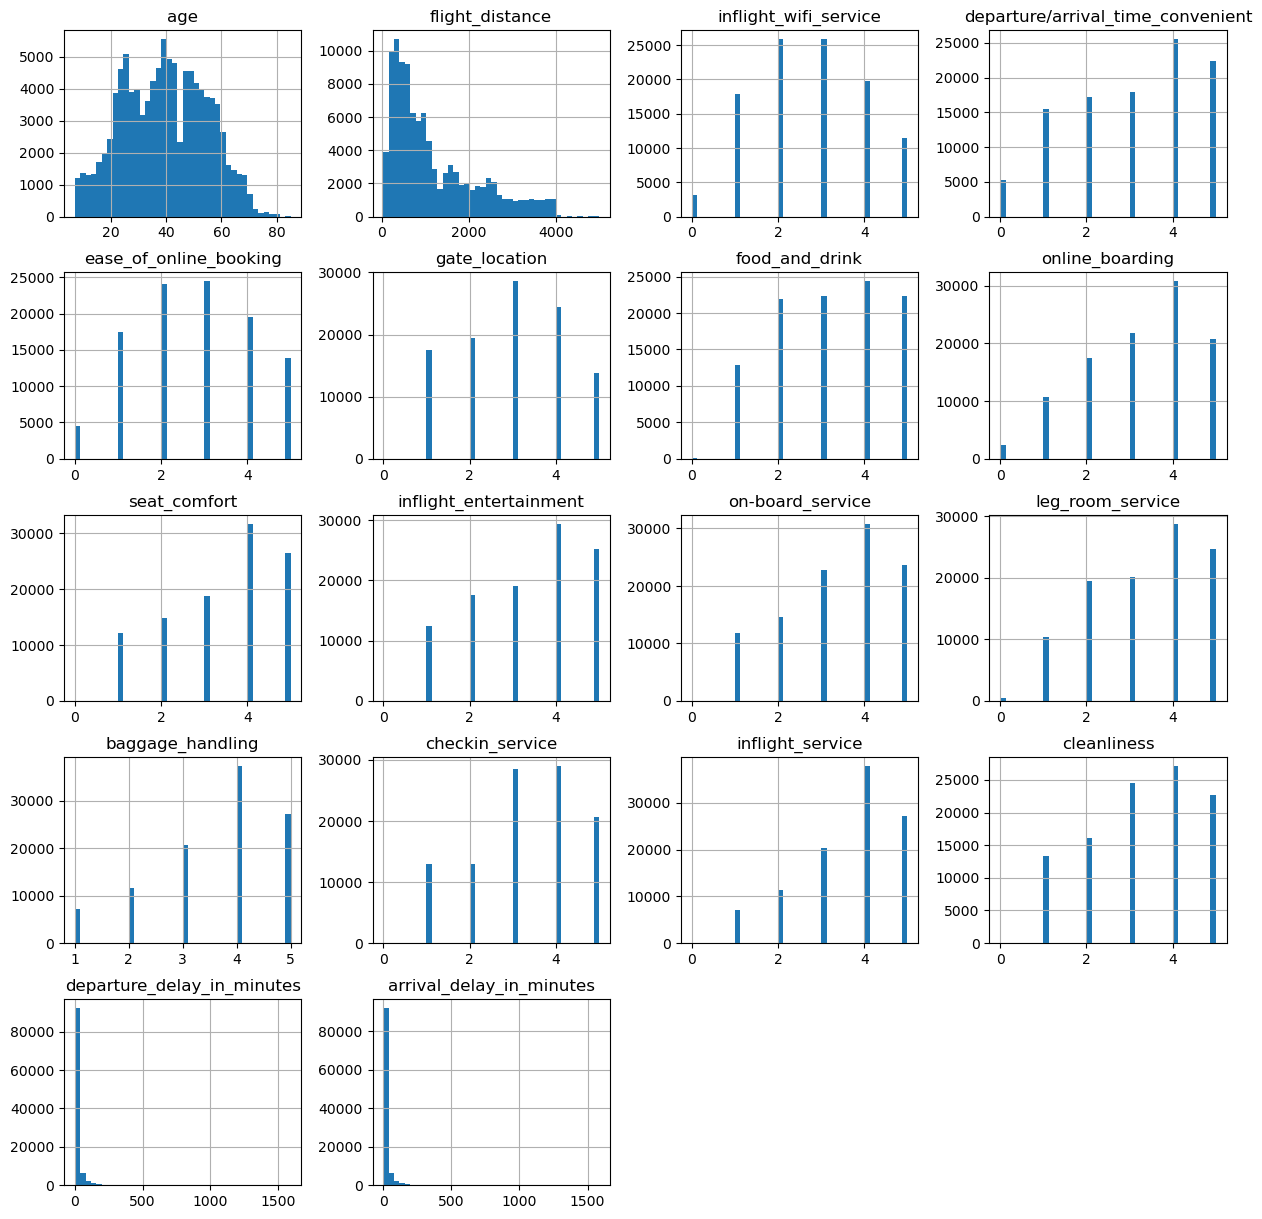

In [46]:
df.hist(bins=40, figsize=(15,15))
plt.show()

### `Detect Outliers and replace them with the median`

column  flight_distance
median  843.0
outliers_indices count  2291
--------------------
column  departure_delay_in_minutes
median  0.0
outliers_indices count  14529
--------------------
column  arrival_delay_in_minutes
median  0.0
outliers_indices count  0
--------------------


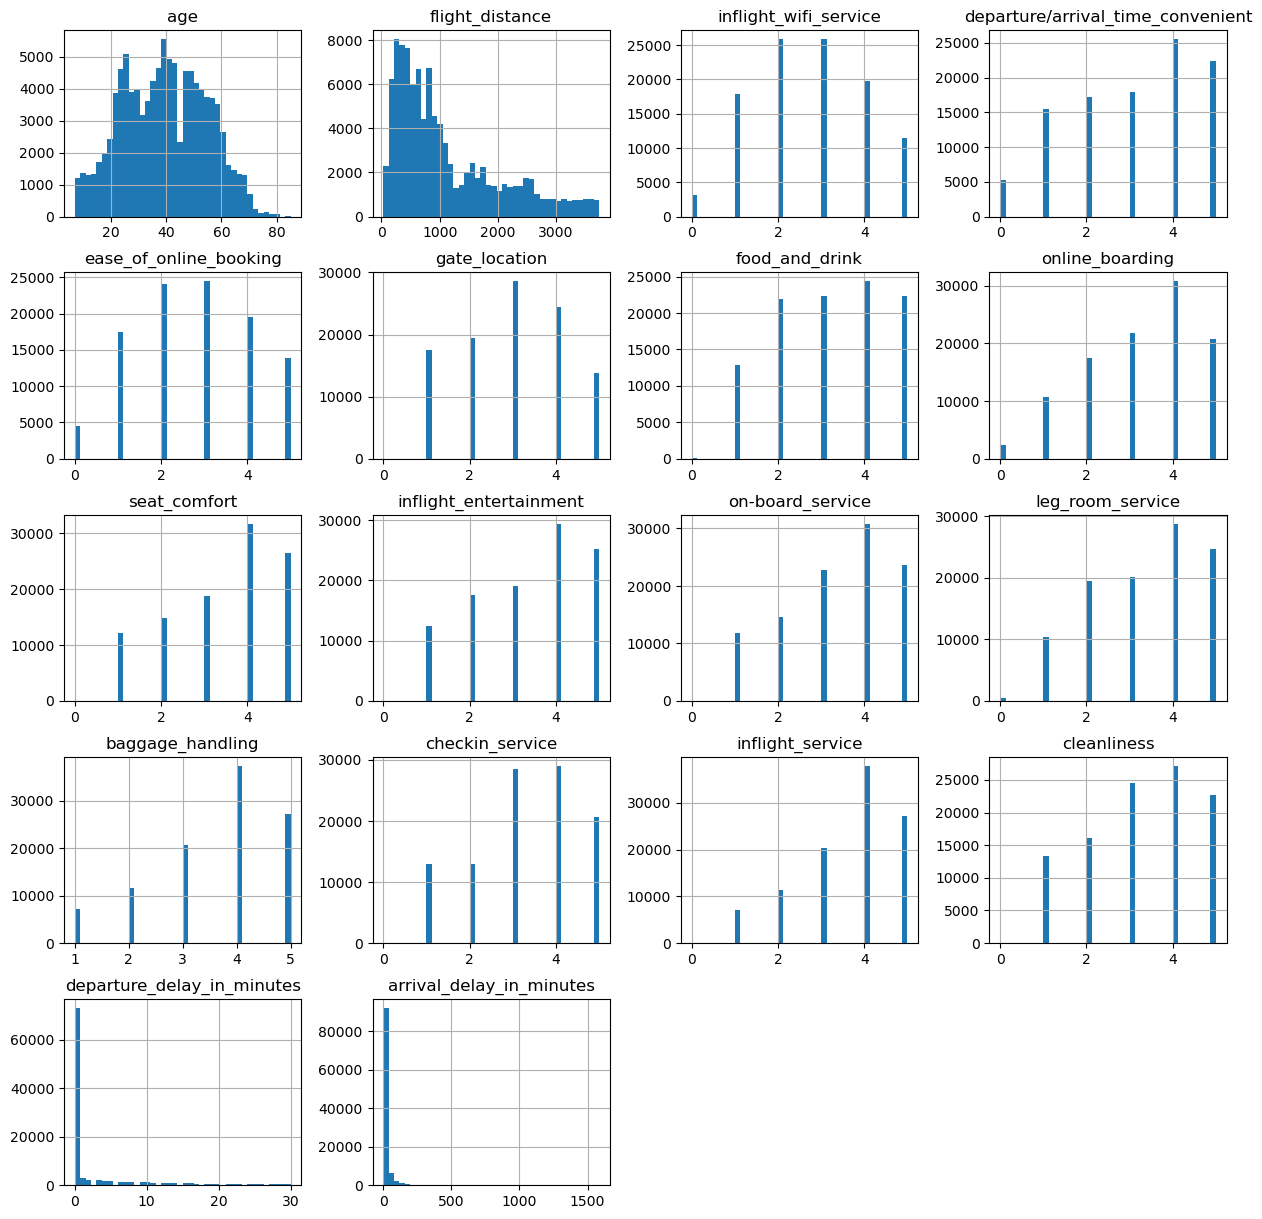

In [56]:
cols = np.array(['flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes'])

for col in cols: 
    outliers_indices = detect_outliers(df, 0, [col])
    
    col_median = df[col].median()
    print('column ', col)
    print('median ', col_median) 
    print('outliers_indices count ',len( outliers_indices))
    print('----'*5)
    df.loc[outliers_indices, col] = col_median

df.hist(bins=40, figsize=(15,15))
plt.show()

### `Diagram to show boxplot of the flight_distance and divided by gender`

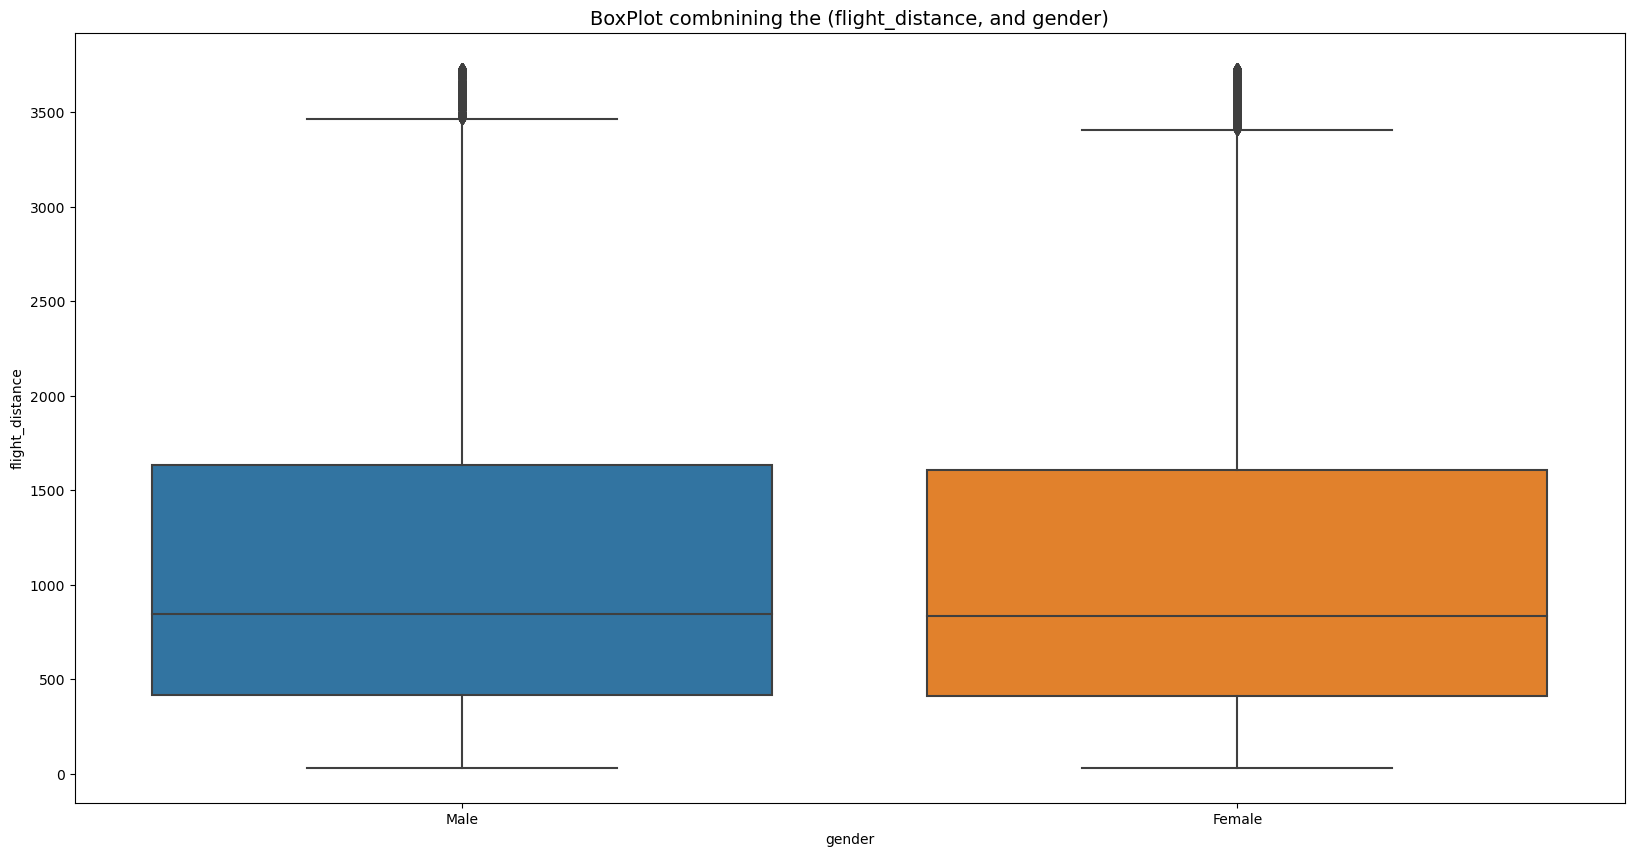

In [57]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, y='flight_distance', x='gender' )
plt.title('BoxPlot combnining the (flight_distance, and gender)', fontsize=14, color='k')
plt.show()